# Loading dataset

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib
from matplotlib import pyplot
import numpy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [97]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
y= data["class"]
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

# AdaBoost

###  The number of trees by default is 50

In [98]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
model_ada.score(X_test, y_test)

0.7316017316017316

### Let's change the number of estimators to 100 

In [99]:
model_ada = AdaBoostClassifier(n_estimators= 100)
model_ada.fit(X_train,y_train)
model_ada.score(X_test, y_test)

0.7316017316017316

### The Adaboost ensemble of 100 trees performs better than the one with 50 trees.

In [100]:
param_grid = dict(n_estimators= range(50,200,10))
grid_search_ada = GridSearchCV(model_ada, param_grid, scoring="accuracy", n_jobs=-1, cv=10, 
verbose=1)
grid_search_ada.fit(X, y)
means_ada = grid_search_ada.cv_results_['mean_test_score']

Fitting 10 folds for each of 15 candidates, totalling 150 fits


### To evaluate the effect of adding more decision trees to the boosting ensembles, we can perform a grid search with a series of values of trees.

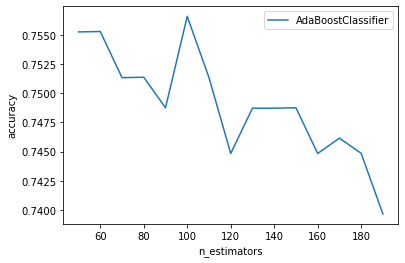

In [101]:
n_estimators=range(50,200,10)
def plot_results(model,means):
    scores = numpy.array(means).reshape(len(n_estimators))
    pyplot.plot(n_estimators, scores, label=str(model)[:-2].split("(")[0])
    pyplot.legend()
    pyplot.xlabel('n_estimators')
    pyplot.ylabel('accuracy')
plot_results(model_ada, means_ada)

### We conclude that for our data, the best number of trees to give as a parameter to the AdaBoost algorithm is 100 trees as it returns the best accuracy.

# Gradient Boosting

###  The number of trees by default is 100

In [102]:
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train,y_train)
model_gbm.score(X_test, y_test)

0.7445887445887446

### Gradient Boosting performance is better than AdaBoost's performance in  terms of accuracy score.As we did before, we perform a grid search for Gradient Boosting, to evaluate the ensembles with different number of trees

Fitting 10 folds for each of 15 candidates, totalling 150 fits


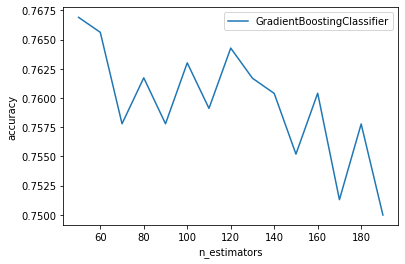

In [103]:
grid_search_gbm = GridSearchCV(model_gbm, param_grid, scoring="accuracy", n_jobs=-1, cv=10, 
verbose=1)
grid_search_gbm.fit(X, y)
means_gbm = grid_search_gbm.cv_results_['mean_test_score']
plot_results(model_gbm,means_gbm)

### Based on the graph above, we conclude that 50 trees gives us the best accuracy score

# XG Boost

###  The number of trees by default is 100

In [104]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
model_xgb.score(X_test, y_test)

0.7402597402597403

### In our example, XG Boost give us the best accuracy score using by default parameters compared to Ada Boost and Gradient Boosting

Fitting 10 folds for each of 15 candidates, totalling 150 fits


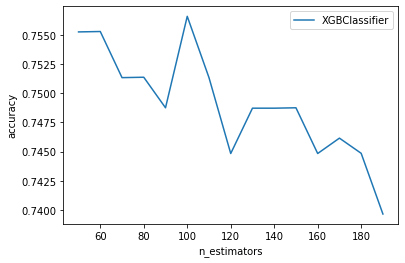

In [105]:
grid_search_xgb = GridSearchCV(model_ada, param_grid, scoring="accuracy", n_jobs=-1, cv=10, 
verbose=1)
grid_search_xgb.fit(X, y)
means_xgb = grid_search_xgb.cv_results_['mean_test_score']
plot_results(model_xgb,means_xgb)

### The graph above shows that the best accuracy of XG Boost was obtained using 100 trees.

# CatBoost classifier

In [106]:
model_catboost = CatBoostClassifier(verbose = False)
model_catboost.fit(X_train, y_train)

# Get the accuracy score on the test data
accuracy = model_catboost.score(X_test, y_test)
print('Accuracy score on the test data: {:.2f}'.format(accuracy))

Accuracy score on the test data: 0.74


### CatBoost classifier gives better accuracy than AdaBoost and gradient boosting

In [107]:
def plot_results(model,means):
    scores = numpy.array(means).reshape(len(n_estimators))
    pyplot.plot(n_estimators, scores, label=str(model)[:-2].split("core")[0])
    pyplot.legend()
    pyplot.xlabel('n_estimators')
    pyplot.ylabel('accuracy')

Fitting 10 folds for each of 15 candidates, totalling 150 fits


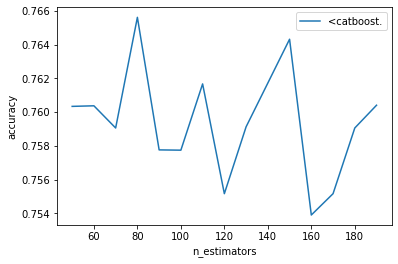

In [108]:
grid_search_catboost = GridSearchCV(model_catboost, param_grid, scoring="accuracy", n_jobs=-1, cv=10, 
verbose=1)
grid_search_catboost.fit(X, y)
means_catboost = grid_search_SGD.cv_results_['mean_test_score']
plot_results(model_catboost,means_catboost)

### As we could see the best performance was found using 80 trees.

# Comparing the different boosting methods

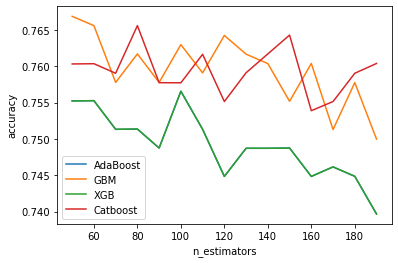

In [109]:
models = ['AdaBoost','GBM','XGB','Catboost']
means=numpy.concatenate((means_ada,means_gbm, means_xgb, means_catboost), axis=None)
scores = numpy.array(means).reshape(len(models), len(n_estimators))
for i, value in enumerate(models):
    pyplot.plot(n_estimators, scores[i], label=str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('accuracy')
pyplot.savefig('boosting_accuracy.png')

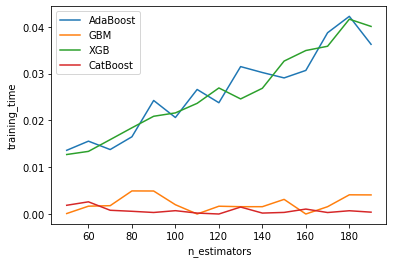

In [110]:
import numpy
models = ['AdaBoost','GBM','XGB','CatBoost']
means=numpy.concatenate((grid_search_ada.cv_results_['mean_score_time'],
                        grid_search_gbm.cv_results_['mean_score_time'],grid_search_xgb.cv_results_['mean_score_time'],grid_search_catboost.cv_results_['mean_score_time']), axis=None)
scores = numpy.array(means).reshape(len(models), len(n_estimators))
for i, value in enumerate(models):
    pyplot.plot(n_estimators, scores[i], label=str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('training_time')
pyplot.savefig('boosting_time.png')


In [112]:
print("AdaBoost " +str(grid_search_ada.best_params_)+ "\t\t: accuracy = "+str(grid_search_ada.best_score_)+" / Training time = "+
str(grid_search_ada.cv_results_['mean_score_time'][grid_search_ada.best_index_])+"(s)")
print("Grandient Boosting " +str(grid_search_gbm.best_params_)+ ": accuracy = "+str(grid_search_gbm.best_score_)+" / Training time = "+
str(grid_search_gbm.cv_results_['mean_score_time'][grid_search_gbm.best_index_])+"(s)")
print("XGBoost "+str(grid_search_xgb.best_params_)+ "\t\t: accuracy = "+str(grid_search_xgb.best_score_)+" / Training time = "+
str(grid_search_xgb.cv_results_['mean_score_time'][grid_search_xgb.best_index_])+"(s)")
print("CatBoost "+str(grid_search_catboost.best_params_)+ "\t\t: accuracy = "+str(grid_search_catboost.best_score_)+" / Training time = "+
str(grid_search_catboost.cv_results_['mean_score_time'][grid_search_catboost.best_index_])+"(s)")

AdaBoost {'n_estimators': 100}		: accuracy = 0.756578947368421 / Training time = 0.020632481575012206(s)
Grandient Boosting {'n_estimators': 50}: accuracy = 0.7669002050580997 / Training time = 9.996891021728516e-05(s)
XGBoost {'n_estimators': 100}		: accuracy = 0.756578947368421 / Training time = 0.02162015438079834(s)
CatBoost {'n_estimators': 80}		: accuracy = 0.7656185919343814 / Training time = 0.0005807161331176757(s)


compare diff methods of boosting using diff numbers of estimatoors with sngle classifiers dt, svm ,knn